**Step 1 - Installation:**
This first code snipped is simply downloading all the repositories from Bitbucket and Github and installing all of the python library dependencies for them. Be aware this can take upwards of 5 minutes to execute. You should only need to run this a single time!

In [ ]:
# Check our directory just in case
%cd /content/

# Clone TTPython and Dependencies
#!rm -r ticktalkpython
!git clone https://bitbucket.org/ccsg-res/ticktalkpython.git
!cd ticktalkpython && git checkout timing
!pip install shapely==1.8
!cd ticktalkpython && pip install -r requirements.txt

# Clone Darknet and Dependencies
#!rm -r darknet
!git clone https://github.com/AlexeyAB/darknet/
!cd darknet/ && apt install libopencv-dev python3-opencv ffmpeg
!pip install nanocamera shapely
!pip install numpy
!pip install scikit-learn scipy
!pip install matplotlib simple_pid

# Build darknet using CPU settings
!cd darknet && sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!cd darknet && sed -i 's/CUDNN=1/CUDNN=0/g' Makefile
!cd darknet && sed -i 's/GPU=1/GPU=0/g' Makefile
!cd darknet && sed -i 's/OPENMP=0/OPENMP=1/g' Makefile
!cd darknet && sed -i 's/AVX=0/AVX=1/g' Makefile
!cd darknet && sed -i 's/LIBSO=0/LIBSO=1/g' Makefile
!cd darknet && make
!chmod +x /content/darknet/libdarknet.so

# Download files from google drive for use with darknet
print(' Begining to download files... this may take a while...')

folders = ['/content/yolofiles', '/content/yolofiles/cav0', '/content/yolofiles/cav1']

files = [['/content/yolofiles/cav_test.txt', 'https://drive.google.com/u/0/uc?id=1WlL20udwRIoJq5Pkq1L6Iv6M3qhlc0MD&export=download'],
         ['/content/yolofiles/cav_train.txt', 'https://drive.google.com/u/0/uc?id=1bf0MobhUnzKnGjLdsBXGTs2vHOFIM2-w&export=download'],
         ['/content/yolofiles/cav.data', 'https://drive.google.com/u/0/uc?id=1jcEDFQ5n56Hq5tWJXXZ5N3Pg-p9qjq9t&export=download'],
         ['/content/yolofiles/cav.names', 'https://drive.google.com/u/0/uc?id=1hP7bfu5Ei-5w1cub5-vZJ-96mx0LLVMY&export=download'],
         ['/content/yolofiles/yolov4-tiny-cav.cfg', 'https://drive.google.com/u/0/uc?id=1yMQntYWsVbJ8h7x0r0Hv5y34o2IGRVJ2&export=download'],
         ['/content/yolofiles/yolov4-tiny-cav.weights', 'https://drive.google.com/u/0/uc?id=1g8r59Xcn5-n6jpc2ZjQdv-1jsLAiKN9w&export=download'],
         ['/content/yolofiles/cav0/cam_output.txt', 'https://drive.google.com/u/0/uc?id=1Vt5BEkVysTk5dJE0Lb47EQttT46LVB97&export=download'],
         ['/content/yolofiles/cav0/lidar_output.txt', 'https://drive.google.com/u/0/uc?id=1fTYHu3lmEIVjul30EfUyGWyvifPSSAQY&export=download'],
         ['/content/yolofiles/cav0/live_test_output.avi', 'https://drive.google.com/u/0/uc?id=1mqnQVoy8ZH2jDLZehC_J2ihtMcBfnse-&export=download'],
         ['/content/yolofiles/cav1/cam_output.txt', 'https://drive.google.com/u/0/uc?id=1xHz5YmlhRC0ex8PSE5IKB8ZA6DBaakDk&export=download'],
         ['/content/yolofiles/cav1/lidar_output.txt', 'https://drive.google.com/u/0/uc?id=1uYCHBluYurS4GGLSgPRpDsMWAY6GCaGb&export=download'],
         ['/content/yolofiles/cav1/live_test_output.avi', 'https://drive.google.com/u/0/uc?id=1kJnRCRyXbBuwu8RojMJgQy1PEngGmuXc&export=download']]


import os.path
import gdown

# Check that the folders exist or create them
for folder in folders:
  if not os.path.exists(folder):
    os.makedirs(folder)

# Check that the files exist or download them
for file in files:
  if os.path.isfile(file[0]):
    print("File " +  file[0] + " found.")
  else:
    print("Downloading file " +  file[0] + ".")
    gdown.download(file[1], file[0], quiet=False)

# Fix a few lines in cav.data
!cd /content/yolofiles && sed -i 's/data\//\/content\/yolofiles\//g' cav.data

# Wait for a second for gdown to finish
import time
time.sleep(1)

# Check if we are done, sometime google drive doesn't download the AVI files and it must be done manually!
all_is_good = True
print("\n\nTTPython setup is checking that all files downloaded correctly....\n")
for file in files:
  if not os.path.isfile(file[0]):
    print("File " +  file[0] + " not found. Please download from ", file[1] ," and upload to the following location using the files menu on the left ", file[0])
    all_is_good = False
if all_is_good:
  print("TTPython setup complete, proceed to next block.")
else:
  print("\n!!!TTPython setup did not prpoerly download (a) file(s), please follow the above steps!!!")

/content
Cloning into 'ticktalkpython'...
^C
/bin/bash: line 1: cd: ticktalkpython: No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 15, in <module>
    from pip._vendor.packaging.requirements import Requirement
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/packaging/requirements.py", line 10, in <module>


**Step 2 - Compile Example 1 in Ticktalk:** Here we will compile example 1 in Ticktalk. Run this cell block and you should see the graph of SQs shown as output.

*Note: Before running this please make sure the last step of the intallation instructions above did not return an error - sometimes the .avi files do not properly download from google drive.*

In [ ]:
# Check our directory just in case
%cd /content/ticktalkpython/

test_name = "example_1_camera_sq"
compile_arg = f"examples/tutorial/{test_name}.py"
%run compile.py $compile_arg

/content/ticktalkpython
Compiling example_1_camera_sq


TTPython.Compiler:INFO:: Compilation successful
TTPython.Compiler:INFO:: Writing ./output/example_1_camera_sq.pickle


Compiled output found at ./output/example_1_camera_sq.pickle


**Step 3 - Run Example 1 in Ticktalk:**
Now that we have compiled example 1 within Ticktalk, lets run the code and see how it goes. Example 1 will spin up a streamify node that reads from a pre-recorded camera stream. This will then be sent to another SQ that will process the camera frames using a darknet based convolutional neural net called YoloV4. Finally the output of each detection frame (CAV locations in in x,y coordinates) will be written to a file in the output folder.

*Note: If this step results in an error check that the intallation instructions did not return an error in the last print statement - sometimes the .avi files do not properly download from google drive and must be done manually.*

In [ ]:
# Check our directory just in case
%cd /content/ticktalkpython/

import ticktalkpython.DebugLogger as log
import logging
log.set_base_logger_level(logging.ERROR)

test_name = "example_1_camera_sq"
simulate_arg = f"./output/{test_name}.pickle"
%run simulate.py $simulate_arg

TTPython.example_1_camera_sq:INFO:: setup sim
TTPython.example_1_camera_sq:INFO:: setup ensembles
TTPython.Ensemble:INFO:: Creating a new TTEnsemble: runtime-manager
TTPython.RuntimeManager:INFO:: input_msg()
TTPython.example_1_camera_sq:INFO:: send graph inputs
TTPython.Ensemble(runtime-manager):INFO:: Begin steady state
TTPython.InputTokenProcess-runtime-manager:INFO:: run sim loop InputTokens
TTPython.ExecutionProcess-runtime-manager:INFO:: run sim loop Execute
TTPython.NetworkManager(runtime-manager):INFO:: run sim loop NetworkManager
TTPython.RuntimeManager(runtime-manager):INFO:: run sim loop RuntimeManager
TTPython.RuntimeManager(runtime-manager):INFO:: *** Message: <Message 0x7a28d0ffb1c0 - type=RuntimeMsg.JoinTickTalkSystem; recipient=Recipient.ProcessRuntimeManager; payload={'name': 'runtime-manager', 'address': <ticktalkpython.Ensemble.TTEnsemble object at 0x7a28d0e98280>}>
TTPython.RuntimeManager(runtime-manager):INFO:: New message of type RuntimeMsg.JoinTickTalkSystem
TTPy

/content/ticktalkpython


TTPython.ExecutionProcess-runtime-manager:INFO:: returned [<TTToken [[[array([[[ 58,  68, 115],
        [ 57,  67, 114],
        [ 57,  67, 114],
        ...,
        [ 62,  76, 130],
        [ 63,  77, 131],
        [ 64,  78, 132]],

       [[ 58,  68, 115],
        [ 57,  67, 114],
        [ 57,  67, 114],
        ...,
        [ 61,  75, 129],
        [ 62,  76, 130],
        [ 62,  76, 130]],

       [[ 60,  68, 115],
        [ 59,  67, 114],
        [ 59,  67, 114],
        ...,
        [ 60,  73, 123],
        [ 59,  74, 124],
        [ 59,  74, 124]],

       ...,

       [[ 69,  75, 130],
        [ 69,  75, 130],
        [ 67,  75, 130],
        ...,
        [ 71,  85, 144],
        [ 71,  85, 144],
        [ 71,  85, 144]],

       [[ 69,  75, 130],
        [ 69,  75, 130],
        [ 67,  75, 130],
        ...,
        [ 73,  87, 146],
        [ 73,  87, 146],
        [ 73,  87, 146]],

       [[ 69,  75, 130],
        [ 69,  75, 130],
        [ 67,  75, 130],
        ...,
   

Opening captured video file  /content/yolofiles/cav1/live_test_output.avi


TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO:: Time-based garbage collection for SQ process_camera-1; Removing everything with time intervals older than -9223372036884775807
TTPython.SQSync:INFO:: New Execution context for SQ process_camera-1
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.ExecutionProcess-runtime-manager:INFO:: Execute for SQ process_camera-1


Started YOLO successfully...


TTPython.ExecutionProcess-runtime-manager:INFO:: returned [<TTToken [[], 1517160744.94081, 1694554156.505975, 1694554158.9026968] T:<TTTime [-9223372036854775807,9223372036854775807] C:<TTClock ROOT ROOT>>, Tag:None>]
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.94081, 1694554156.505975, 1694554158.9026968] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (-9223372036854775807,9223372036854775807)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-1', 'execute_time': 0, 'completion_time': 0}>]; source='process_camera-1'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x7a28d0e981c0>
TTPython.NetworkManager(runtime-manager):INFO:: New message of type NetMsg.SendTokenList
TTPython.InputTokenProces

Processed cam_time:1517160744.94081, sys_proc_time:2.396721839904785 cam_timestamp: 1517160744.94081


**Step 4 - Compile Example 2 in Ticktalk:**
 Here we will compile example 2 in Ticktalk. Run this cell block and you should see the graph of SQs shown as output. This step is similar to step 3 but we have changed the program to example 2.

In [ ]:
# Check our directory just in case
%cd /content/ticktalkpython/

test_name = "example_2_camera_lidar_fusion_stream"
compile_arg = f"examples/tutorial/{test_name}.py"
%run compile.py $compile_arg

/content/ticktalkpython
Compiling example_2_camera_lidar_fusion_stream


TTPython.Compiler:INFO:: Compilation successful
TTPython.Compiler:INFO:: Writing ./output/example_2_camera_lidar_fusion_stream.pickle


Compiled output found at ./output/example_2_camera_lidar_fusion_stream.pickle


**Step 5 - Run Example 2 in Ticktalk:**
Now that we have compiled example 2 within Ticktalk, lets run the code and see how it goes. Example 2 will spin up two different streamify nodes, one similar to example 1 that reads from a pre-recorded camera stream. This will then be sent to another SQ that will process the camera frames using a darknet based convolutional neural net called YoloV4. The second streamify node is opening frames from a recording of a LIDAR mounted next to the camera from example 1. This will be sent to another SQ that qill cluster the points seen by the lidar and then take the centroid of the clusters. Finally the output of both of these recognition pipelines (CAV locations in in x,y coordinates) will be ingested by a final SQ that will perform a sensor fusion on the matching frames and then writes the results to an output file. We will visualize the contents of this output file in the next step.

In [ ]:
# Check our directory just in case
%cd /content/ticktalkpython/

# Run the graph that should have been compiled and saved in the previous block. This will fail if that has not been run yet. Note that jupyter is MUCH slower than running the same code from the terminal (2-3 orders of magnitude)
import ticktalkpython.DebugLogger as log
import logging
log.set_base_logger_level(logging.ERROR)

test_name = "example_2_camera_lidar_fusion_stream"
simulate_arg = f"./output/{test_name}.pickle"
%run simulate.py $simulate_arg --timeout 10000000000

TTPython.example_2_camera_lidar_fusion_stream:INFO:: setup sim
TTPython.example_2_camera_lidar_fusion_stream:INFO:: setup ensembles
TTPython.Ensemble:INFO:: Creating a new TTEnsemble: runtime-manager
TTPython.RuntimeManager:INFO:: input_msg()
TTPython.example_2_camera_lidar_fusion_stream:INFO:: send graph inputs
TTPython.Ensemble(runtime-manager):INFO:: Begin steady state
TTPython.InputTokenProcess-runtime-manager:INFO:: run sim loop InputTokens
TTPython.ExecutionProcess-runtime-manager:INFO:: run sim loop Execute
TTPython.NetworkManager(runtime-manager):INFO:: run sim loop NetworkManager
TTPython.RuntimeManager(runtime-manager):INFO:: run sim loop RuntimeManager
TTPython.RuntimeManager(runtime-manager):INFO:: *** Message: <Message 0x799aa34e4190 - type=RuntimeMsg.JoinTickTalkSystem; recipient=Recipient.ProcessRuntimeManager; payload={'name': 'runtime-manager', 'address': <ticktalkpython.Ensemble.TTEnsemble object at 0x799aa34e5f90>}>
TTPython.RuntimeManager(runtime-manager):INFO:: New

/content/ticktalkpython


TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <Message 0x799aa326dea0 - type=NetMsg.ForwardNetworkMessage; recipient=Recipient.ProcessNetwork; payload=('runtime-manager', [<Message 0x799aa349faf0 - type=SyncMsg.InstantiateSQ; recipient=Recipient.ProcessInputTokens; payload=<ticktalkpython.SQSync.TTSQSync object at 0x799aa34e1900>>, <Message 0x799aa326dc60 - type=ExecuteMsg.InstantiateSQ; recipient=Recipient.ProcessExecute; payload=<ticktalkpython.SQExecute.TTSQExecute object at 0x799aa34e1600>>, <Message 0x799aa326ddb0 - type=NetMsg.InstantiateSQ; recipient=Recipient.ProcessNetwork; payload=('lidar_sampler-16', [[<TTArcDestination Ens=runtime-manager; SQ-name=process_lidar-18; Port=0>]])>])>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <Message 0x799aa326e0b0 - type=NetMsg.ForwardNetworkMessage; recipient=Recipient.Proces

Opening captured video file  /content/yolofiles/cav1/live_test_output.avi
Started YOLO successfully...


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (6250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.4420073, 1694554440.671666, 1694554444.209134] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (6250000,8750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 7500000, 'completion_time': 7500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO:: Seque

Started LIDAR successfully...
Started FUSION successfully...
Opening captured video file  /content/yolofiles/cav1/live_test_output.avi


TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [array([[[ 58,  68, 115],
        [ 57,  67, 114],
        [ 57,  67, 114],
        ...,
        [ 62,  76, 130],
        [ 63,  77, 131],
        [ 64,  78, 132]],

       [[ 58,  68, 115],
        [ 57,  67, 114],
        [ 57,  67, 114],
        ...,
        [ 61,  75, 129],
        [ 62,  76, 130],
        [ 62,  76, 130]],

       [[ 60,  68, 115],
        [ 59,  67, 114],
        [ 59,  67, 114],
        ...,
        [ 60,  73, 123],
        [ 59,  74, 124],
        [ 59,  74, 124]],

       ...,

       [[ 69,  75, 130],
        [ 69,  75, 130],
        [ 67,  75, 130],
        ...,
        [ 71,  85, 144],
        [ 71,  85, 144],
        [ 71,  85, 144]],

       [[ 69,  75, 130],
        [ 69,  75, 130],
        [ 67,  75, 130]

Started YOLO successfully...


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (6250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-17.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.4420073, 1694554445.6626673, 1694554447.7933934] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (6250000,8750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-17', 'execute_time': 7500000, 'completion_time': 7500000}>]; source='process_camera-17'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO:: Seq

Started LIDAR successfully...
Started FUSION successfully...
Started FUSION successfully...
Processed global fusion @  1694554448.5984564


TTPython.ExecutionProcess-runtime-manager:INFO:: Execute for SQ camera_sampler-9
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [array([[[ 57,  63, 109],
        [ 58,  64, 110],
        [ 59,  65, 111],
        ...,
        [ 55,  73, 124],
        [ 56,  75, 130],
        [ 59,  78, 133]],

       [[ 58,  64, 110],
        [ 58,  64, 110],
        [ 59,  65, 111],
        ...,
        [ 54,  72, 123],
        [ 55,  74, 129],
        [ 57,  76, 131]],

       [[ 58,  63, 111],
        [ 58,  63, 111],
        [ 59,  64, 112],
        ...,
        [ 52,  70, 116],
        [ 54,  73, 122],
        [ 57,  76, 125]],

       ...,

       [[ 68,  76, 131],
        [ 68,  76, 131],
        [ 67,  75, 130],
        ...,
        [ 76,  89, 145],
        [ 76,  89, 145],
        [ 76,  89, 

Processed global fusion @  1694554450.7432766


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (21250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.6962125, 1694554450.7626147, 1694554451.489187] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (21250000,23750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 22500000, 'completion_time': 22500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO::

Processed global fusion @  1694554452.5312345


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (28750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.8158193, 1694554452.556356, 1694554453.4073057] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (28750000,31250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 30000000, 'completion_time': 30000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO::

Processed global fusion @  1694554454.5961115


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (36250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.94081, 1694554454.629022, 1694554456.0120366] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (36250000,38750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 37500000, 'completion_time': 37500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO:: S

Processed global fusion @  1694554457.834607


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (43750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.0666728, 1694554457.8646615, 1694554459.2044094] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (43750000,46250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 45000000, 'completion_time': 45000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO:

Processed global fusion @  1694554460.5978901


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (51250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.192575, 1694554460.6301513, 1694554461.7239988] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (51250000,53750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 52500000, 'completion_time': 52500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO::

Processed global fusion @  1694554463.530901


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (58750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.3158987, 1694554463.5516846, 1694554464.461951] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (58750000,61250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 60000000, 'completion_time': 60000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO::

Processed global fusion @  1694554466.1475048


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (66250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.4410622, 1694554466.1662655, 1694554467.0102046] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (66250000,68750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 67500000, 'completion_time': 67500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO:

Processed global fusion @  1694554468.6782131


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (73750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.566688, 1694554468.7045784, 1694554469.538685] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (73750000,76250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 75000000, 'completion_time': 75000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO:: 

Processed global fusion @  1694554471.352547


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (81250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.6912174, 1694554471.3751733, 1694554472.2651894] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (81250000,83750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 82500000, 'completion_time': 82500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO:

Processed global fusion @  1694554474.2240922


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (88750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.8158069, 1694554474.2515543, 1694554475.3655012] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (88750000,91250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 90000000, 'completion_time': 90000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO:

Processed global fusion @  1694554477.4103532


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (96250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.9412398, 1694554477.4355433, 1694554478.531262] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (96250000,98750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 97500000, 'completion_time': 97500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO::

Processed global fusion @  1694554480.7902913


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (103750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[-0.003441373329034175, -0.865358198991717]], 1517160746.0665026, 1694554480.8203142, 1694554481.9296532] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (103750000,106250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 105000000, 'completion_time': 105000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message 

Processed global fusion @  1694554483.8519037


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (111250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[-0.003441373329034175, -0.865358198991717]], 1517160746.1914642, 1694554483.880157, 1694554485.1271563] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (111250000,113750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 112500000, 'completion_time': 112500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message o

Processed global fusion @  1694554487.313545


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (118750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[-0.003441373329034175, -0.865358198991717]], 1517160746.316678, 1694554487.3381093, 1694554488.350685] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (118750000,121250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 120000000, 'completion_time': 120000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of

Processed global fusion @  1694554490.3393233


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (126250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.0028075240566118524, -0.8652733890648613]], 1517160746.4408467, 1694554490.3579707, 1694554491.4568927] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (126250000,128750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 127500000, 'completion_time': 127500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message

Processed global fusion @  1694554493.7680562


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (133750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.008138030452538185, -0.899271562622139]], 1517160746.566424, 1694554493.7865667, 1694554494.7426927] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (133750000,136250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 135000000, 'completion_time': 135000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of

Processed global fusion @  1694554497.3887818


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (141250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.008138030452538185, -0.899271562622139]], 1517160746.6909685, 1694554497.4151006, 1694554498.4858935] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (141250000,143750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 142500000, 'completion_time': 142500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message o

Processed global fusion @  1694554500.534553


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (148750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.010515400731248167, -0.9023762833190547]], 1517160746.8158865, 1694554500.554788, 1694554501.6163263] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (148750000,151250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 150000000, 'completion_time': 150000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message o

Processed global fusion @  1694554503.9322631


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (156250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.01382339599290339, -0.9061695991954992]], 1517160746.940828, 1694554503.9518774, 1694554505.0270467] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (156250000,158750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 157500000, 'completion_time': 157500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of

Processed global fusion @  1694554507.2460732


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (163750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.015795892877938714, -0.9127126037911276]], 1517160747.0661042, 1694554507.2762628, 1694554508.278189] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (163750000,166250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 165000000, 'completion_time': 165000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message o

Processed global fusion @  1694554510.6748528


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (171250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.01538318206212555, -0.9516186750097021]], 1517160747.1922448, 1694554510.701508, 1694554511.73187] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (171250000,173750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 172500000, 'completion_time': 172500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of t

Processed global fusion @  1694554513.891156


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (178750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.01764724490937848, -0.9663992592731854]], 1517160747.3157904, 1694554513.9126241, 1694554515.188587] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (178750000,181250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 180000000, 'completion_time': 180000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of

Processed global fusion @  1694554517.5711136


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (186250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.01975844054566889, -0.9678593991529585]], 1517160747.4410994, 1694554517.5956104, 1694554518.7797818] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (186250000,188750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 187500000, 'completion_time': 187500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message o

Processed global fusion @  1694554521.8893218


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (193750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.02053637700029338, -0.9551875535236495]], 1517160747.5661073, 1694554521.915044, 1694554522.9808433] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (193750000,196250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 195000000, 'completion_time': 195000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of

Processed global fusion @  1694554525.3966172


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (201250000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.017088443248221185, -0.9500769465629826]], 1517160747.6907666, 1694554525.416831, 1694554526.8540475] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (201250000,203750000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 202500000, 'completion_time': 202500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message o

Processed global fusion @  1694554529.0326707


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (208750000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.017710369288137174, -0.9573807965253373]], 1517160747.8165593, 1694554529.067736, 1694554530.6052332] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (208750000,211250000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 210000000, 'completion_time': 210000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x799aa34e5f60>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message o

RuntimeError: ignored

**Step 6 - Display Example 2 Data:**
The data from example 1 was fairly easy to look at as there was only a single other vehicle in the scene that it was detecting. However example 2 has many more detections from the LIDAR. Therefore we have created a display function that reads in the output from example 2 and will display it on a 2D graph.

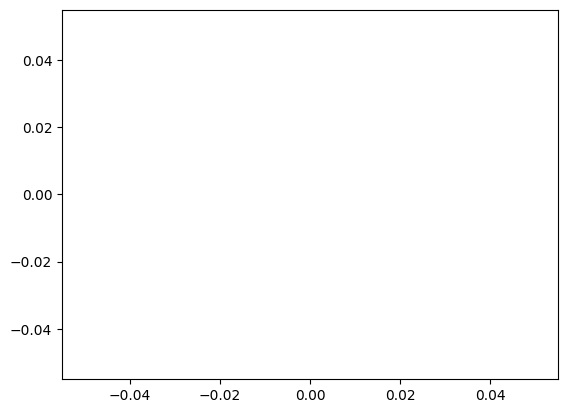

In [ ]:
import matplotlib.pyplot as plt
import json

# define an empty list
data = []

# open file and read the content in a list
with open('/content/ticktalkpython/output/example_2_output.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentData = line[:-1]

        # add item to the list
        data.append(json.loads(currentData))

x = []
y = []
for frame in data:
  #print(frame)
  results = frame[0]
  for item in results:
    x.append(item[0])
    y.append(item[1])

plt.plot(x, y, 'o', color='black');
plt.show()

**Step 7 - Compile and Run Example 2 in Ticktalk w/ Non-Achievable Timing:**

*Part 1:* Lets go into the source code and try to change some timing parameters for TTPython. The first one we should change is TTPeriod. This construct dictates the period at which our streams will send new data. In the original example 2 this was set to 750000 or 750ms. This is because in the free tier of Google Colab the entire recognition pipeline takes about 700ms to execute so we add a little extra space to make sure that it always has enough processing time. Go change this number to something else like TTPeriod=250000. After you change this value in examples/example_2_camera_lidar_fusion_stream.py, run the following step to check the results. The telltale sign of a deadline that is too short will be that the sensor fusion SQ will not be firing when you set the log level to WARN. This is because if either the LIDAR or CAMERA don't arrive within the time window then the Local Fusion SQ will not fire as often. A telltale sign of a deadline that is too long will be too much extra wait time between the SQ that writes to the file and the next subsequent streamify node firing. This again is visible if the log level is set to Warn so that the SQ firings are shown in the console output.

*Part 2:* Next we should take a look at another construct, TTDataIntervalWidth. This specifies the time range at which TTPython will match the outputs of two streams and consider them to be match-able. In this example our default value is TTDataIntervalWidth=250000 or 250ms because +-250ms is enough range that the LIDAR and Camera streams will be properly matched even taking into account that LIDAR recognition and Camera recognition must run before the matching stage. Lets make this not work then, because camera recognition takes around 300ms on Google collab using an interval width like TTDataIntervalWidth=125000 should cause none of our streams to match, and thus will not allow the local_fusion node to fire! Conversely if the TTDataIntervalWidth is too large then steams with timesteps that are very far apart may be matched. This is very hard to see in this example as we do not specifically print the timestamps of the data that was matched but some simple changes to the code in the sensor fusion SQ could do it. Make sure to change TTPeriod back to 750000 before messing with the TTDataIntervalWidth so we are only testing one construct at a time.

*Part 3:* Now it is your turn to go crazy and try combinations of TTPeriod and TTDataIntervalWidth to see what happens. Try answering the following questions:

1.   What is the smallest you can make TTDataIntervalWidth and the application still works? The application still working is defined as the sensor fusion node firing when you have the logging level set to warn because if the interval is too small the streams will not be matched and therefore the sensor fusion wont fire.
2.   What is the smallest you can make TTPeriod and the application still works? Is there a number where it works sometimes but not all the time - i.e. you are within the timing "jitter" zone? This zone will be an area where sometimes the write to file SQ fires and sometimes it does not, which should be visible with logging set to warn.

When you are done answering these questions, just make sure to change the values back to the default values of TTDataIntervalWidth=250000 and TTPeriod=750000.


In [ ]:
# Check our directory just in case
%cd /content/ticktalkpython/

test_name = "example_2_camera_lidar_fusion_stream"
compile_arg = f"examples/tutorial/{test_name}.py"
%run compile.py $compile_arg

%cd /content/ticktalkpython/

import ticktalkpython.DebugLogger as log
import logging
log.set_base_logger_level(logging.ERROR)

# Remove our old output file
!rm /content/ticktalkpython/output/example_2_output.txt

#stm.streaming_merge_sim(filename='./output/' + test_name + '.pickle')
simulate_arg = f"./output/{test_name}.pickle"
%run simulate.py $simulate_arg --timeout 10000000000

/content/ticktalkpython
Compiling example_2_camera_lidar_fusion_stream
/content/ticktalkpython
Opening captured video file  /content/yolofiles/cav1/live_test_output.avi
Started YOLO successfully...
Started LIDAR successfully...


Traceback (most recent call last):
  File "/content/ticktalkpython/ticktalkpython/ExecuteProcess.py", line 329, in run_sim
    self.handle_message(next_msg)
  File "/content/ticktalkpython/ticktalkpython/ExecuteProcess.py", line 430, in handle_message
    self.execute(execution_context)
  File "/content/ticktalkpython/ticktalkpython/ExecuteProcess.py", line 792, in execute
    return_token_list = sq_execute.function(
  File "/content/ticktalkpython/ticktalkpython/SQ.py", line 782, in wrapper
    return_value = function(*token_values, **kwargs)
  File "", line 15, in process_lidar
  File "/content/ticktalkpython/libraries/lidar_recognition.py", line 314, in processLidarFrame
    y_pred = db.fit_predict(array)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_dbscan.py", line 446, in fit_predict
    self.fit(X, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_dbscan.py", line 407, in fit
    core_samples = np.asarray(n_neighbors

RuntimeError: ignored

**Step 8 - Compile Example 3 in Ticktalk:**
 Here we will compile example 3 in Ticktalk. Run this cell block and you should see the graph of SQs shown as output. This step is similar to step 5 but we have changed the program to example 3. Example 3 adds in the global fusion steps as well as ensemble construct which explained better in step 9.

In [ ]:
# Check our directory just in case
%cd /content/ticktalkpython/


test_name = "example_3_two_cavs_fusion_stream"
compile_arg = f"examples/tutorial/{test_name}.py"
%run compile.py $compile_arg

/content/ticktalkpython
Compiling example_3_two_cavs_fusion_stream


**Step 9 - Run Example 3 in Ticktalk:**
Now that we have compiled example 3 within Ticktalk, lets run the code and see how it goes. Example 3 will use same code from example 2, but will create 2 copies of it that read in from different data files. After the local fusion is done (same as example 2) the output from each CAV is sent to the global fusion function (which is just a wrapper for a second call of local fusion) where it is fused together to get a global picture of what is going on. You may also notice some new concepts are introduced here - ensembles. Using similar syntax to the Python "with" construct we can designate sections of code to will be deployed to specifically names ensembles - such as "CAV0", "CAV1" and "RSU" in this example.

In [ ]:

# Check our directory just in case
%cd /content/ticktalkpython/

# Run the streaming_merge graph that should have been compiled and saved in the previous block. This will fail if that has not been run yet. Note that jupyter is MUCH slower than running the same code from the terminal (2-3 orders of magnitude)

import ticktalkpython.DebugLogger as log
import logging
log.set_base_logger_level(logging.ERROR)

test_name = "example_3_two_cavs_fusion_stream"
simulate_arg = f"./output/{test_name}.pickle"
%run simulate.py $simulate_arg --timeout 10000000000

/content/ticktalkpython
Opening captured video file  /content/yolofiles/cav1/live_test_output.avi
Started YOLO successfully...
Started LIDAR successfully...
Started FUSION successfully...
Opening captured video file  /content/yolofiles/cav1/live_test_output.avi
Started YOLO successfully...
Started LIDAR successfully...
Started FUSION successfully...
Started FUSION successfully...
Processed global fusion @  1689367071.3099704
Processed global fusion @  1689367072.3037279
Processed global fusion @  1689367073.4109416
Processed global fusion @  1689367074.4269125
Processed global fusion @  1689367075.5367577
Processed global fusion @  1689367076.533923
Processed global fusion @  1689367077.9301946
Processed global fusion @  1689367079.342698
Processed global fusion @  1689367081.539802
Processed global fusion @  1689367083.9216757
Processed global fusion @  1689367099.1833832
Processed global fusion @  1689367122.2937877
Processed global fusion @  1689367143.0226736
Processed global fusio

**Step 10 - Compile Example 4 in Ticktalk:**
 Here we will compile example 4 in Ticktalk. Run this cell block and you should see the graph of SQs shown as output. This step is similar to step 8 but we have changed the program to example 4. Example 4 adds in the PlanB deadline construct.

In [ ]:
# Check our directory just in case
%cd /content/ticktalkpython/

test_name = "example_4_two_cavs_fusion_stream_deadline_ensemble"
compile_arg = f"examples/tutorial/{test_name}.py"
%run compile.py $compile_arg

/content/ticktalkpython
Compiling example_4_two_cavs_fusion_stream_deadline_ensemble


**Step 11 - Run Example 4 in Ticktalk:**
Now that we have compiled example 4 within Ticktalk, lets run the code and see how it goes. Example 4 seems almost identical to example 3. However one major thing has changed - we have added deadlines. Actual Cyber Physical Systems don't always meet their deadlines - many times due to uncontrollable external variables like network speed or sensor failure. When that happens we need a mechanism to make sure that time critical SQs still get executed and that appropriate action can be taken to mitigate damage. In the case of driving a CAV this could mean an emergency stopping maneuver. In the case of our application we have been working on, we have multiple inputs to the global fusion and we want to make sure it still runs even when one or even both of the locally fused CAV sensor data does not arrive in time. To do this we add in the TTPython PlanB deadline construct to detect the missed deadline and create a new array that is empty to send in its place. The global fusion application knows how to handle empty arrays and it will use all available data from other vehicles as well as the Kalman filter predictions to create a best answer for where all objects are until hopefully the next iteration when the deadline is met again. TTPython also allows for a deadline to stop the subsequent SQ from firing as well using the TTContinue clause but setting it to false.

In [ ]:
# Check our directory just in case
%cd /content/ticktalkpython/

import ticktalkpython.DebugLogger as log
import logging

test_name = "example_4_two_cavs_fusion_stream_deadline_ensemble"
simulate_arg = f"./output/{test_name}.pickle"
%run simulate.py $simulate_arg --timeout 10000000000

/content/ticktalkpython
Opening captured video file  /content/yolofiles/cav1/live_test_output.avi
Started YOLO successfully...
Started LIDAR successfully...
Started FUSION successfully...
Opening captured video file  /content/yolofiles/cav1/live_test_output.avi
Started YOLO successfully...
Started LIDAR successfully...
Started FUSION successfully...
Started FUSION successfully...
Processed global fusion @  1689372818.3330343
Processed global fusion @  1689372819.7359033
Processed global fusion @  1689372821.8496523
Processed global fusion @  1689372822.8718066
Processed global fusion @  1689372823.8896327
Processed global fusion @  1689372824.824949
Processed global fusion @  1689372826.2686334
Processed global fusion @  1689372827.8883252
Processed global fusion @  1689372829.2859907
Processed global fusion @  1689372830.711823
Processed global fusion @  1689372846.7499664
Processed global fusion @  1689372869.51912
Processed global fusion @  1689372891.056727
Processed global fusion 

**Step 12: Test the Plan Be Deadline Construct**
Let us purposefully introduce some errors into the streams of example 4 so that we can test out the deadline construct. In order to do this we will be using a TTPython testing construct that allows us to note send a token. We will then selectively not send a token from CAV1 every 4th time the local sensor fusion is called on CAV1. This would simulate a connection link going down or being too slow resulting in the need to fire the global fusion without the data. Due to some slowdowns we have simulating all aspects of this demo on Google Colab this plan B deadline fires every 10 seconds but in the real CAVs it would be set to 100 milliseconds after the streamify nodes fire. What we should see if the log level is set to Warn is that the global fusion node will fire and we will get an output in the example_4_output.txt file for each iteration despite the fact CAV1 will not send any results every 4th iteration. Our global fusion will receive an empty array from PlanB for CAV1 and the Kalman filter will run without input for many of the tracked objects. However the Kalman filter is set up to keep tracking objects until it does not see them for at least 4 iterations so what will happen is that we will get a predicted output from the global fusion for these select tracks for the specific iteration that the CAV1 does not send any output. However the next data frame CAV1 will send data as usual and as long as the prediction was not too far off the matching step will still be able to associate it with the correct data from CAV1 and the Kalman Filter will continue almost as if nothing had happened. This is a very important feature for real time cyber-physical systems with slow communication or other problems where missing data is not uncommon so we must operate on what data we have.

In [ ]:
# Check our directory just in case
%cd /content/ticktalkpython/

test_name = "example_4_two_cavs_fusion_stream_deadline_ensemble_test"
compile_arg = f"examples/tutorial/{test_name}.py"
%run compile.py $compile_arg

%cd /content/ticktalkpython/

import ticktalkpython.DebugLogger as log
import logging

log.set_base_logger_level(logging.WARN)

# Remove our old output file
!rm /content/ticktalkpython/output/example_4_output.txt

simulate_arg = f"./output/{test_name}.pickle"
%run simulate.py $simulate_arg --timeout 10000000000

/content/ticktalkpython
Compiling example_4_two_cavs_fusion_stream_deadline_ensemble_test


TTPython.Compiler:INFO:: Compilation successful
TTPython.Compiler:INFO:: Writing ./output/example_4_two_cavs_fusion_stream_deadline_ensemble_test.pickle


Compiled output found at ./output/example_4_two_cavs_fusion_stream_deadline_ensemble_test.pickle
/content/ticktalkpython
rm: cannot remove '/content/ticktalkpython/output/example_4_output.txt': No such file or directory


TTPython.example_4_two_cavs_fusion_stream_deadline_ensemble_test:INFO:: setup sim
TTPython.example_4_two_cavs_fusion_stream_deadline_ensemble_test:INFO:: setup ensembles
TTPython.Ensemble:INFO:: Creating a new TTEnsemble: runtime-manager
TTPython.RuntimeManager:INFO:: input_msg()
TTPython.example_4_two_cavs_fusion_stream_deadline_ensemble_test:INFO:: send graph inputs
TTPython.Ensemble(runtime-manager):INFO:: Begin steady state
TTPython.InputTokenProcess-runtime-manager:INFO:: run sim loop InputTokens
TTPython.ExecutionProcess-runtime-manager:INFO:: run sim loop Execute
TTPython.NetworkManager(runtime-manager):INFO:: run sim loop NetworkManager
TTPython.RuntimeManager(runtime-manager):INFO:: run sim loop RuntimeManager
TTPython.RuntimeManager(runtime-manager):INFO:: *** Message: <Message 0x78ac82307ac0 - type=RuntimeMsg.JoinTickTalkSystem; recipient=Recipient.ProcessRuntimeManager; payload={'name': 'runtime-manager', 'address': <ticktalkpython.Ensemble.TTEnsemble object at 0x78ac823140

Opening captured video file  /content/yolofiles/cav1/live_test_output.avi
Started YOLO successfully...


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (1875000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.4420073, 1694554793.469883, 1694554794.806353] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (1875000,3125000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 2500000, 'completion_time': 2500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.Executio

Started LIDAR successfully...
Started FUSION successfully...
Opening captured video file  /content/yolofiles/cav1/live_test_output.avi
Started YOLO successfully...


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (1875000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-20.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.4420073, 1694554795.4585567, 1694554796.834327] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (1875000,3125000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-20', 'execute_time': 2500000, 'completion_time': 2500000}>]; source='process_camera-20'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.InputTokenProcess-runtime-manager:INFO:: New message of type SyncMsg.InputToken
TTPython.SQSync:INFO:: Sequ

Started LIDAR successfully...
Started FUSION successfully...
Started FUSION successfully...
Processed global fusion @  1694554797.1880095


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (4375000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.5750518, 1694554797.2244332, 1694554798.384917] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (4375000,5625000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 5000000, 'completion_time': 5000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.Executi

Processed global fusion @  1694554799.5977495


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (6875000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.6962125, 1694554799.6203337, 1694554800.472558] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (6875000,8125000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 7500000, 'completion_time': 7500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.Executi

Processed global fusion @  1694554801.6768744


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (9375000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.8158193, 1694554801.7024105, 1694554802.7170799] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (9375000,10625000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 10000000, 'completion_time': 10000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.Exe

Processed global fusion @  1694554804.1253765


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (11875000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160744.94081, 1694554804.151211, 1694554805.1373103] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (11875000,13125000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 12500000, 'completion_time': 12500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.Exec

Processed global fusion @  1694554806.5927978


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (14375000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.0666728, 1694554806.6667733, 1694554807.7477412] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (14375000,15625000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 15000000, 'completion_time': 15000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.E

Processed global fusion @  1694554809.4180937


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (16875000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.192575, 1694554809.4495938, 1694554810.422221] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (16875000,18125000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 17500000, 'completion_time': 17500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.Exe

Processed global fusion @  1694554812.5124016


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (19375000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.3158987, 1694554812.5368924, 1694554813.6523893] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (19375000,20625000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 20000000, 'completion_time': 20000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.E

CAV  1  sending no fusion result.
deadline ran
deadline ran
Processed global fusion @  1694554815.9172096


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (21875000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.4410622, 1694554815.9400613, 1694554817.5549147] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (21875000,23125000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 22500000, 'completion_time': 22500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.E

Processed global fusion @  1694554819.9774828


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (24375000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.566688, 1694554820.0271556, 1694554821.324561] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (24375000,25625000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 25000000, 'completion_time': 25000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.Exe

Processed global fusion @  1694554823.1314824


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (26875000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.6912174, 1694554823.1601152, 1694554824.6612465] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (26875000,28125000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 27500000, 'completion_time': 27500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.E

Processed global fusion @  1694554827.5746434


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (29375000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.8158069, 1694554827.603769, 1694554828.7930765] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (29375000,30625000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 30000000, 'completion_time': 30000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.Ex

Processed global fusion @  1694554831.3081965


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (31875000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[], 1517160745.9412398, 1694554831.3308375, 1694554832.665373] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (31875000,33125000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 32500000, 'completion_time': 32500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type ExecuteMsg.NewExecutionContext
TTPython.Ex

Processed global fusion @  1694554835.0097442


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (34375000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[-0.003441373329034175, -0.865358198991717]], 1517160746.0665026, 1694554835.0400426, 1694554836.5590687] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (34375000,35625000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 35000000, 'completion_time': 35000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of typ

Processed global fusion @  1694554838.8931055


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (36875000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[-0.003441373329034175, -0.865358198991717]], 1517160746.1914642, 1694554838.9167387, 1694554840.003975] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (36875000,38125000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 37500000, 'completion_time': 37500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type

Processed global fusion @  1694554842.090882


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (39375000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[-0.003441373329034175, -0.865358198991717]], 1517160746.316678, 1694554842.120765, 1694554843.3073063] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (39375000,40625000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 40000000, 'completion_time': 40000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type 

CAV  1  sending no fusion result.
deadline ran
deadline ran
Processed global fusion @  1694554845.4897454


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (41875000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.0028075240566118524, -0.8652733890648613]], 1517160746.4408467, 1694554845.508422, 1694554846.7571533] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (41875000,43125000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 42500000, 'completion_time': 42500000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of typ

Processed global fusion @  1694554849.317515


TTPython.ExecutionProcess-runtime-manager:INFO:: Retriggering: <TTToken None T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (44375000,9223372036854775807)>, Tag:<TTTag: u=u1.sq=process_camera-11.p=1.e=runtime-manager>>
TTPython.NetworkManager(runtime-manager):INFO:: *** Received input message <SendTokenListMessage - type=<NetMsg.SendTokenList: 0>; recipient=<Recipient.ProcessNetwork: 3>; payload=[<NetMsgToken msg_type:<NetMsg.SendToken: 1>; payload={'token': <TTToken [[[0.008138030452538185, -0.899271562622139]], 1517160746.566424, 1694554849.3436754, 1694554850.431016] T:<TTTimeSpec c:<TTClockSpec name:ROOT, parent:None>, (44375000,45625000)>, Tag:<TTTag: u=u1.sq=None.p=None.e=None>>, 'source_sq': 'process_camera-11', 'execute_time': 45000000, 'completion_time': 45000000}>]; source='process_camera-11'>
TTPython.NetworkManager(runtime-manager):INFO:: *** Going into queue <queue.Queue object at 0x78ac82316890>
TTPython.ExecutionProcess-runtime-manager:INFO:: New message of type E

RuntimeError: ignored

**End of Beginner Section:**
If you have made it to this point then it is safe to consider yourself a beginer user of TTPython, congradulations! The following steps in the tutorial get progressivly harder and involve conversion of vanilla Python coder over to TTPython should you choose to accept the challenge but with it comes with the ability to graduate to intermediate or even expert TTPython user.

**Step 12: (Intermediate) Convert Example 1 from Non-TTPython to TTPython:**
Here is the code for example 1 but not using the TTPython constructs. It is worth mentioning this will not work exactly the same as the TTPython version as many of the timing guarantees are not present here - nor is the example automatically threaded like TTPython is. Your task here, should you choose to accept it will help you solidify all the TTPython concepts you learned today. Try running this example code. After that, open up the source code and try to convert it to TTPython. If you can complete this task for this simple application you can move onto the next example which is more complex.

In [ ]:
# Check our directory just in case
%cd /content/ticktalkpython/

# non tt-python version
!cd examples/ && python streamify_camera_darknet_non_tt.py

**Step 13: (Advanced) Converting Example 2 Non-TTPython to TTPython:**
Similar to step 12, we are once again giving you the code for a regular python version of example 2. It has more streamify nodes and starts to introduce the concepts of merging streams and data interval validity. If you can convert this example over and get it to run similarly to the python version it is safe to say you are now an Advanced TTPython user!

In [ ]:
# Check our directory just in case
%cd /content/ticktalkpython/

# non tt-python version
!python examples/streamify_camera_lidar_non_tt.py

**Step 14: (Expert) The Grande Finale - Use Example 2 Python Code to Create Examples 3 and 4:** TTPython is very versatile. In the previous steps 11 and 12 we gave you non-TTPython code to convert over. To get to Example 3 and 4 doesn't require any additional code. What it does require is properly creating duplicate versions of that code to create a second CAV as well as the RSU which is calling the same local sensor fusion algorithm again to get the global fusion. To get to the examples 3 you must properly declare ensembles and multiple copies of the code that you created in example 2. And finally to get to example 4 you need to surround the global fusion inputs with the PlanB deadline construct and set the timing of that correctly. If you can accomplish all of this you can officially call yourself a TTPython Expert user!